**Question 11 (Resampling)**

In [61]:
from __future__ import print_function, division

import thinkstats2
import thinkplot

import first
import hypothesis
import numpy as np
%matplotlib inline

Read data

In [62]:
live, firsts, others = first.MakeFrames()

In [63]:
class DiffMeansPermute(thinkstats2.HypothesisTest):
    """Tests a difference in means by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: data in whatever form is relevant        
        """
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        """Build a model of the null hypothesis.
        """
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [64]:
class DiffMeansResample(DiffMeansPermute):
    def RunModel(self):
        group1 = np.random.choice(self.pool, self.n, replace=True)
        group2 = np.random.choice(self.pool, self.m, replace=True)
        return group1, group2

In [65]:
    data = firsts.prglngth.values, others.prglngth.values
    ht_l = DiffMeansResample(data)
    p_value = ht_l.PValue(iters=10000)
    print('\nmeans permute preglength')
    print('p-value =', p_value)
    print('actual =', ht_l.actual)
    print('ts max =', ht_l.MaxTestStat())


means permute preglength
p-value = 0.1589
actual = 0.0780372667775
ts max = 0.205348362367


Pregnacy length:

For p-value calculation, resample method shows the same numbers as permutation.  The effect is not statistically significant.

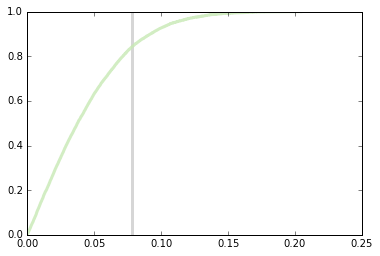

In [66]:
ht_l.PlotCdf()

In [67]:
    data = (firsts.totalwgt_lb.dropna().values,
            others.totalwgt_lb.dropna().values)
    ht_w = DiffMeansResample(data)
    p_value = ht_w.PValue(iters=10000)
    print('\nmeans permute birthweight')
    print('p-value =', p_value)
    print('actual =', ht_w.actual)
    print('ts max =', ht_w.MaxTestStat())


means permute birthweight
p-value = 0.0
actual = 0.124761184535
ts max = 0.115853212662


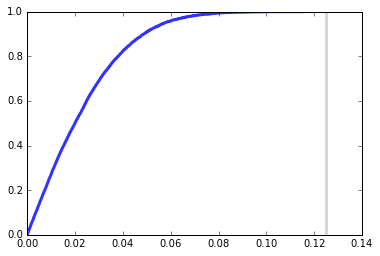

In [68]:
ht_w.PlotCdf()

For total weight:

For p-value calculation, resample method shows the same numbers as permutation.  The effect is statistically significant.